In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot 
import pandas as pd
import numpy as np
import missingno as msno
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime, date
import lightgbm as lgb
# Comment this if the data visualisations doesn't work on your side
%matplotlib inline

#plt.style.use('bmh')

In [2]:
from pandas_profiling import ProfileReport

In [3]:
luco = pd.read_csv('.\datasets\Aquifer_Luco.csv')

In [11]:
luco.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7487 entries, 2000-01-01 to 2020-06-30
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Rainfall_Simignano                   6822 non-null   float64
 1   Rainfall_Siena_Poggio_al_Vento       951 non-null    float64
 2   Rainfall_Mensano                     1722 non-null   float64
 3   Rainfall_Montalcinello               6525 non-null   float64
 4   Rainfall_Monticiano_la_Pineta        2205 non-null   float64
 5   Rainfall_Sovicille                   6657 non-null   float64
 6   Rainfall_Ponte_Orgia                 1260 non-null   float64
 7   Rainfall_Scorgiano                   3036 non-null   float64
 8   Rainfall_Pentolina                   2116 non-null   float64
 9   Rainfall_Monteroni_Arbia_Biena       3104 non-null   float64
 10  Depth_to_Groundwater_Podere_Casetta  3346 non-null   float64
 11  Depth_to_Gro

In [5]:
luco.head(5)

,Date,Rainfall_Simignano,Rainfall_Siena_Poggio_al_Vento,Rainfall_Mensano,Rainfall_Montalcinello,Rainfall_Monticiano_la_Pineta,Rainfall_Sovicille,Rainfall_Ponte_Orgia,Rainfall_Scorgiano,Rainfall_Pentolina,...,Depth_to_Groundwater_Pozzo_1,Depth_to_Groundwater_Pozzo_3,Depth_to_Groundwater_Pozzo_4,Temperature_Siena_Poggio_al_Vento,Temperature_Mensano,Temperature_Pentolina,Temperature_Monteroni_Arbia_Biena,Volume_Pozzo_1,Volume_Pozzo_3,Volume_Pozzo_4
0,01/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,5.50,0.80,NaN,NaN,NaN
1,02/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,6.20,3.25,NaN,NaN,NaN
2,03/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,7.25,0.95,NaN,NaN,NaN
3,04/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,7.00,4.20,NaN,NaN,NaN
4,05/01/2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,0.0,7.90,6.55,NaN,NaN,NaN


In [6]:
luco.tail(5)

,Date,Rainfall_Simignano,Rainfall_Siena_Poggio_al_Vento,Rainfall_Mensano,Rainfall_Montalcinello,Rainfall_Monticiano_la_Pineta,Rainfall_Sovicille,Rainfall_Ponte_Orgia,Rainfall_Scorgiano,Rainfall_Pentolina,...,Depth_to_Groundwater_Pozzo_1,Depth_to_Groundwater_Pozzo_3,Depth_to_Groundwater_Pozzo_4,Temperature_Siena_Poggio_al_Vento,Temperature_Mensano,Temperature_Pentolina,Temperature_Monteroni_Arbia_Biena,Volume_Pozzo_1,Volume_Pozzo_3,Volume_Pozzo_4
7482,26/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-12.0,-10.7,-11.1,24.45,22.65,22.50,19.55,-125.506506,-147.012716,-49.136663
7483,27/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-12.1,-10.8,-11.1,24.80,22.95,22.60,20.15,-125.506506,-147.012716,-49.136663
7484,28/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-12.1,-10.7,-11.1,25.90,23.40,23.80,21.05,-125.506506,-147.012716,-49.136663
7485,29/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-12.2,-10.8,-11.1,24.85,23.30,23.55,20.30,-125.506506,-147.012716,-49.136663
7486,30/06/2020,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-12.1,-10.8,-11.1,25.75,23.70,24.20,21.65,-125.506506,-147.012716,-49.136663


<AxesSubplot:>

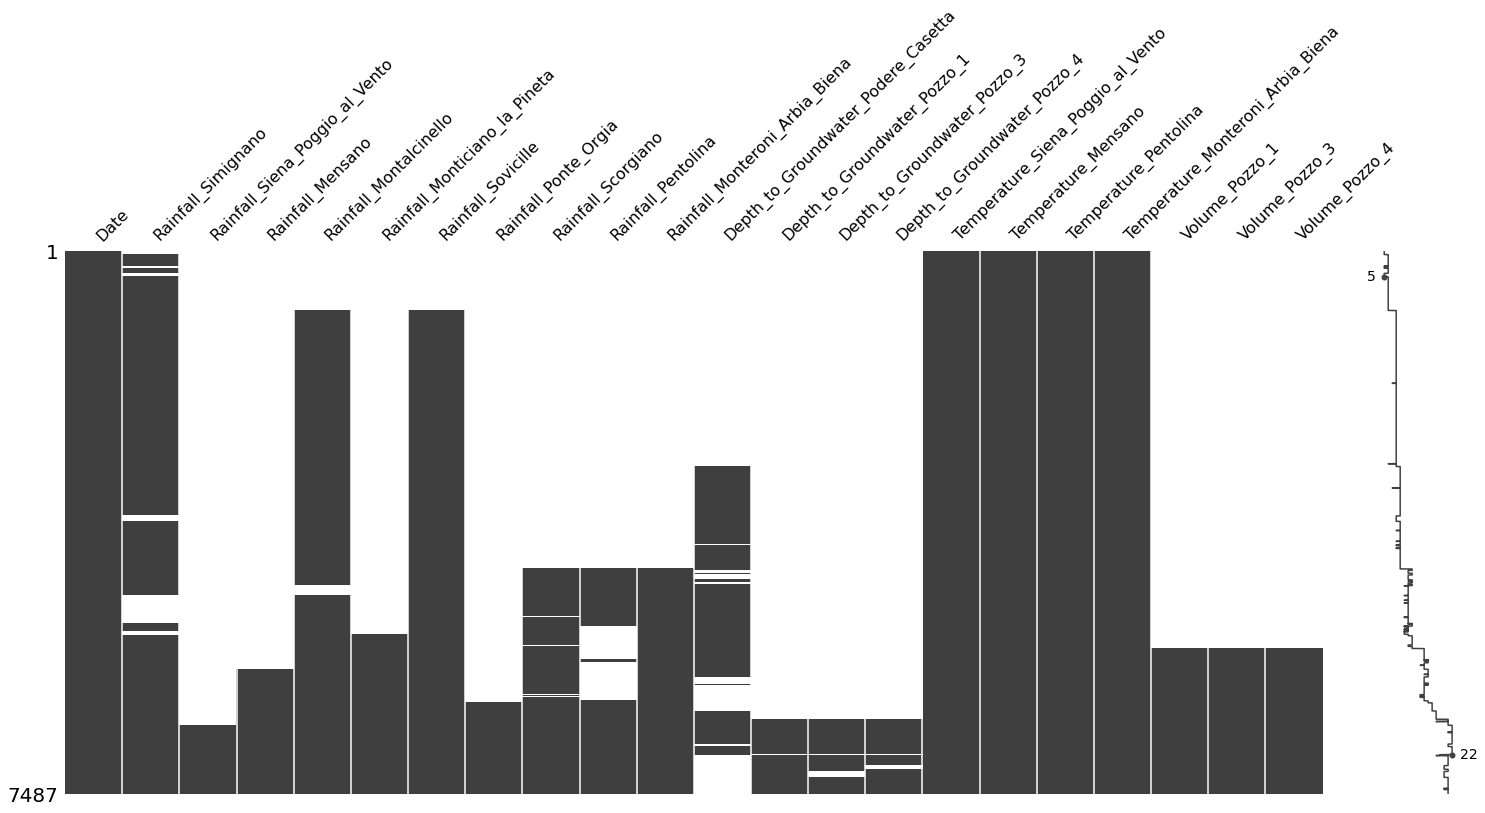

In [7]:
msno.matrix(luco)

In [10]:
col_names=pd.Series(luco.columns)
col_names

0                      Rainfall_Simignano
1          Rainfall_Siena_Poggio_al_Vento
2                        Rainfall_Mensano
3                  Rainfall_Montalcinello
4           Rainfall_Monticiano_la_Pineta
5                      Rainfall_Sovicille
6                    Rainfall_Ponte_Orgia
7                      Rainfall_Scorgiano
8                      Rainfall_Pentolina
9          Rainfall_Monteroni_Arbia_Biena
10    Depth_to_Groundwater_Podere_Casetta
11           Depth_to_Groundwater_Pozzo_1
12           Depth_to_Groundwater_Pozzo_3
13           Depth_to_Groundwater_Pozzo_4
14      Temperature_Siena_Poggio_al_Vento
15                    Temperature_Mensano
16                  Temperature_Pentolina
17      Temperature_Monteroni_Arbia_Biena
18                         Volume_Pozzo_1
19                         Volume_Pozzo_3
20                         Volume_Pozzo_4
dtype: object

In [9]:
luco['Date']=pd.to_datetime(luco['Date'],format='%d/%m/%Y')
luco.set_index('Date',inplace=True)

numpy.ndarray

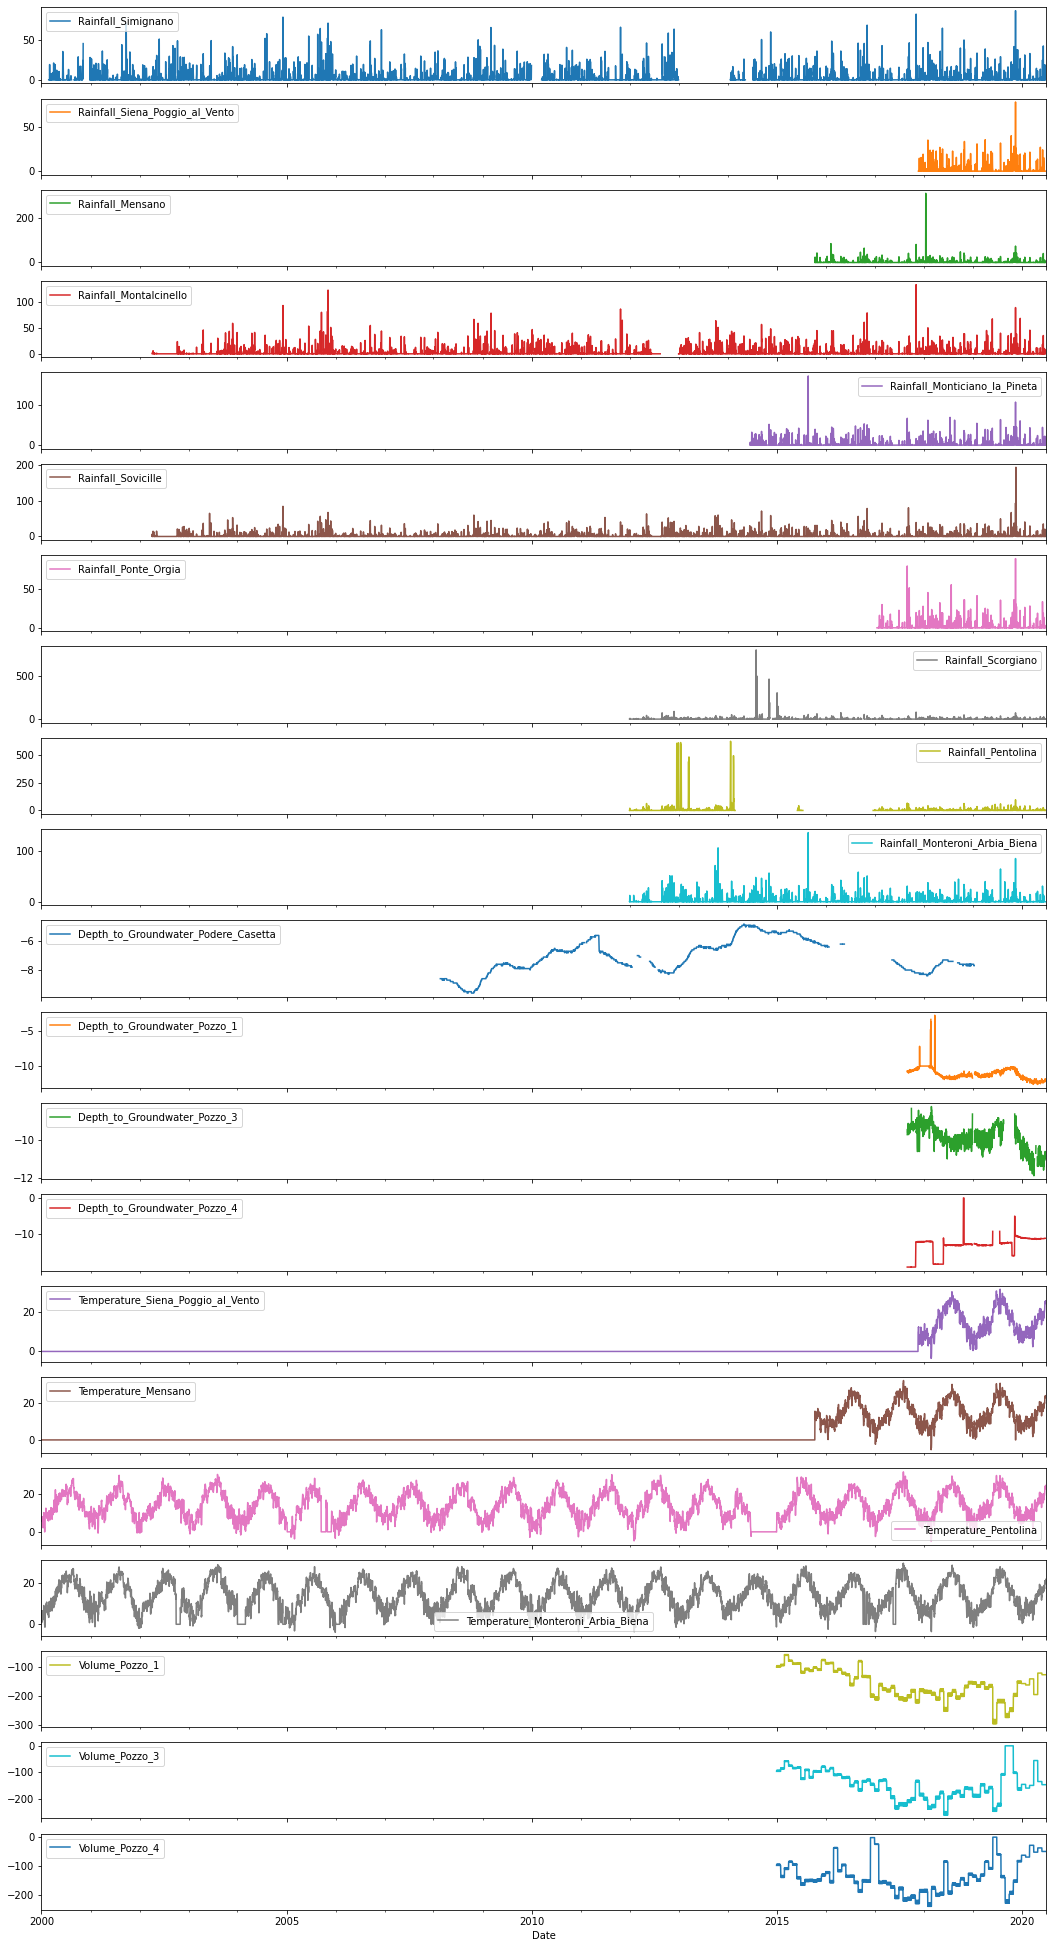

In [12]:
axes = luco.plot.line(subplots=True,figsize=(18,35))
type(axes)

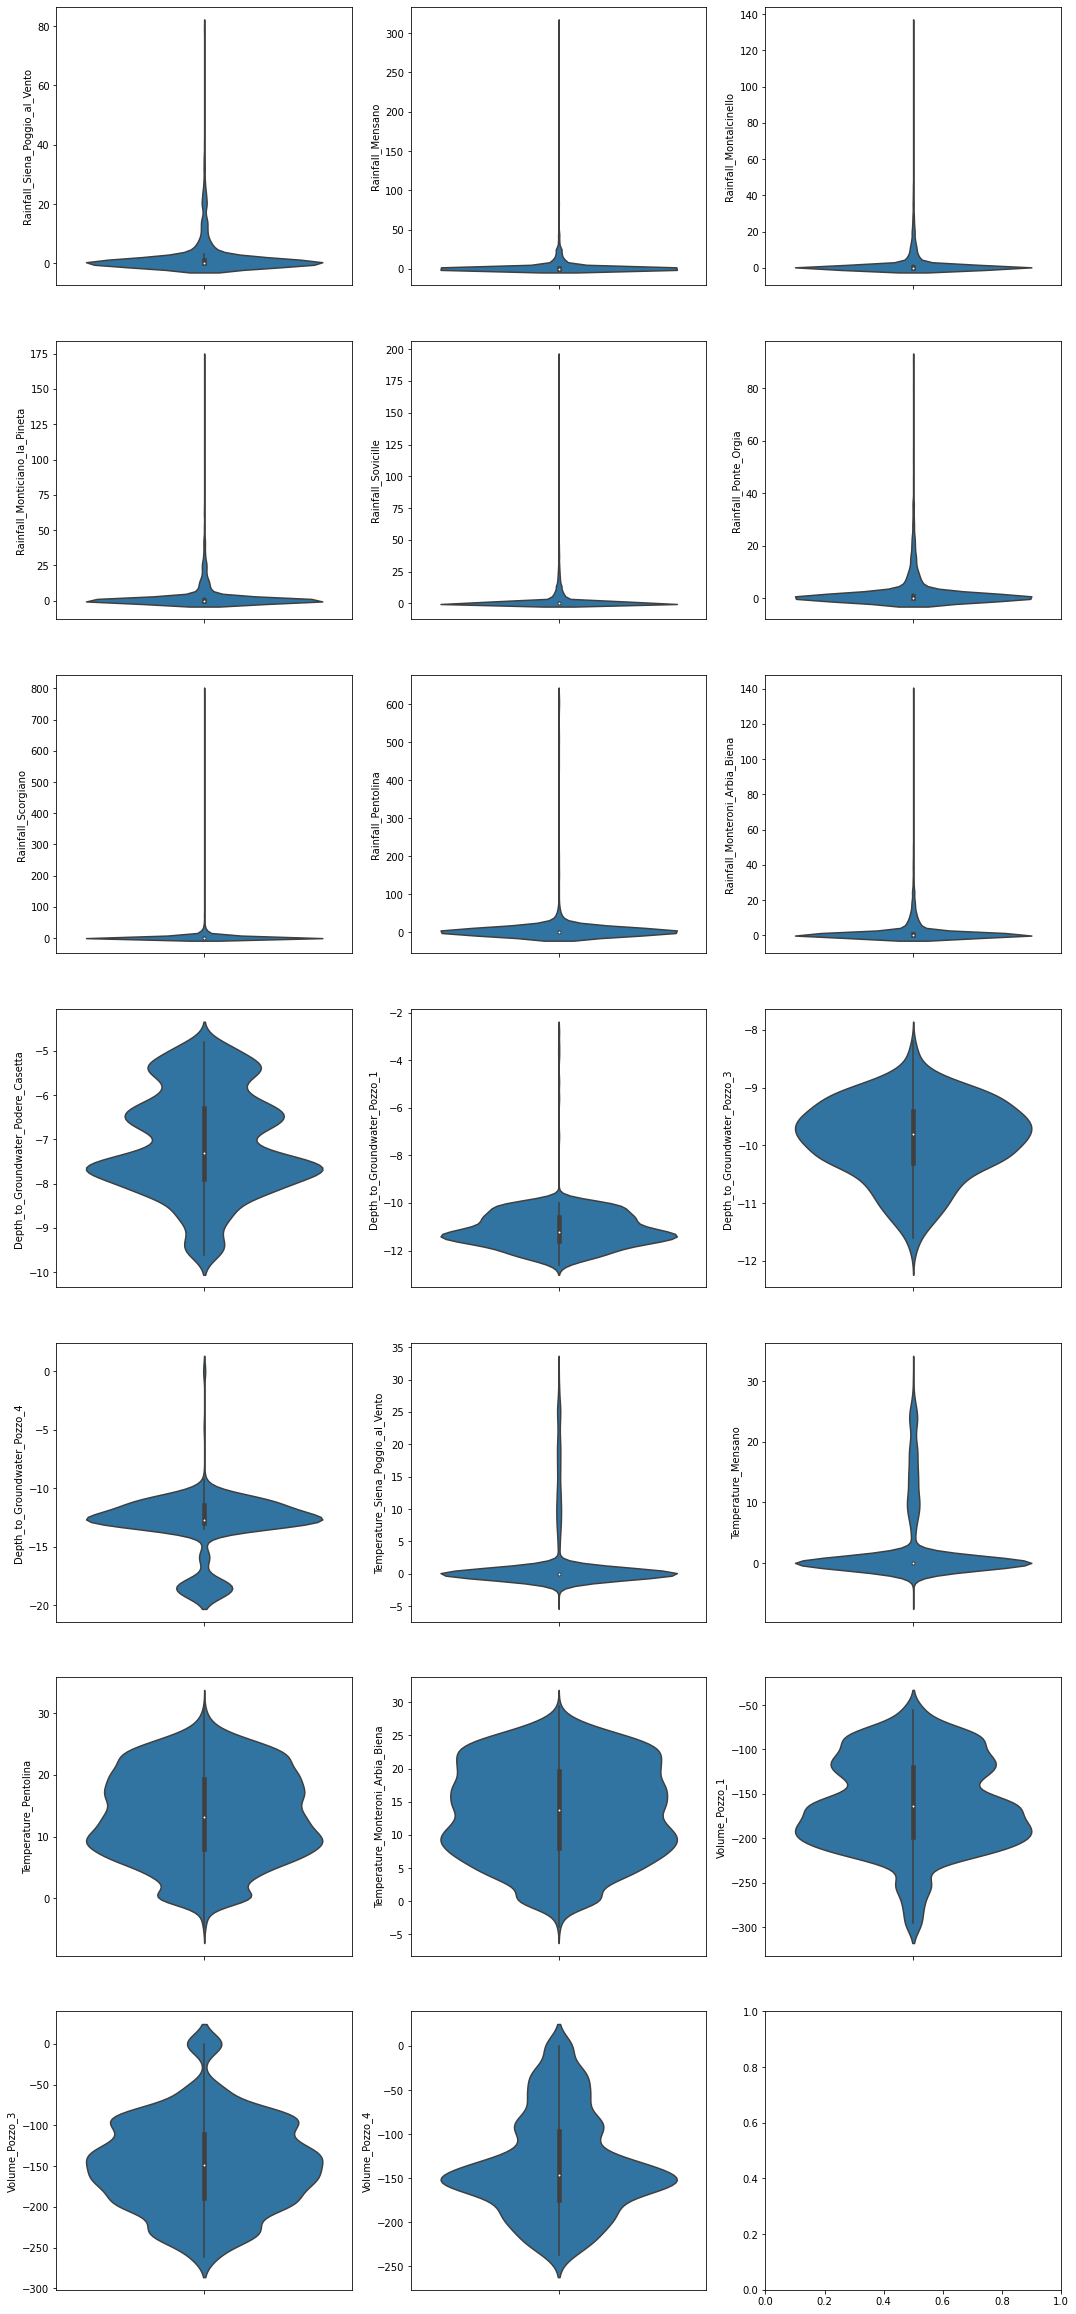

In [13]:
row_num=((len(col_names)-1)//3)+1
fig, ax = pyplot.subplots(nrows=row_num,ncols=3,figsize =(18, row_num*6))   
ax1=ax.flatten()
for i,t in enumerate(col_names[1:]):
    sns.violinplot(ax=ax1[i],y=t, data=luco) 